In [85]:
import pandas as pd
import yfinance as yf

start_date = '2003-01-01'
end_date = '2024-04-30'

df = yf.download('TRY=X', start=start_date, end=end_date)
tüfe=pd.read_excel("Tüketici_Fiyat_Genel_Endeksi.xlsx")

[*********************100%%**********************]  1 of 1 completed


In [86]:
df.reset_index(inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df['Yıl']=df['Date'].dt.year
df['Ay']=df['Date'].dt.month
avg_close=df.groupby(['Yıl','Ay'])['Close'].mean()
pivot_table = avg_close.reset_index().pivot(index='Yıl', columns='Ay', values='Close')
pivot_table.reset_index(inplace=True)
new_columns={'YIL':'Yıl'}
for i in range(1,13):
    old_column=tüfe.columns[i]
    new_columns[old_column]=i
tüfe.rename(columns=new_columns,inplace=True)
tüfe

,Yıl,1,2,3,4,5,6,7,8,9,10,11,12
0,2024,1984.02,2073.88,2139.47,2207.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,1203.48,1241.33,1269.75,1300.04,1300.60,1351.59,1479.84,1614.31,1691.04,1749.11,1806.50,1859.38
2,2022,763.23,799.93,843.64,904.79,931.76,977.90,1001.03,1015.65,1046.89,1084.00,1115.26,1128.45
3,2021,513.30,517.96,523.53,532.32,537.05,547.48,557.36,563.60,570.66,584.32,604.84,686.95
4,2020,446.45,448.02,450.58,454.43,460.62,465.84,468.56,472.61,477.21,487.38,498.58,504.81
5,2019,398.07,398.71,402.81,409.63,413.52,413.63,419.24,422.84,427.04,435.59,437.25,440.50
6,2018,330.75,333.17,336.48,342.78,348.34,357.44,359.41,367.66,390.84,401.27,395.48,393.88
7,2017,299.74,302.17,305.24,309.23,310.61,309.78,310.24,311.85,313.88,320.40,325.18,327.41
8,2016,274.44,274.38,274.27,276.42,278.02,279.33,282.58,281.76,282.27,286.33,287.81,292.54
9,2015,250.45,252.24,255.23,259.39,260.85,259.51,259.74,260.78,263.11,267.20,268.98,269.54


In [87]:
merged_df=pd.merge(tüfe,pivot_table,on='Yıl',how='inner')
new_columns = {'Yıl': 'Yıl'}
for i in range(1, 13):
    new_columns[f'{i}_x'] = f'TÜFE_{i}. Ay'
    new_columns[f'{i}_y'] = f'Dolar_{i}. Ay'

# Sütun adlarını değiştirme
merged_df.rename(columns=new_columns, inplace=True)

merged_df.columns

Index(['Yıl', 'TÜFE_1. Ay', 'TÜFE_2. Ay', 'TÜFE_3. Ay', 'TÜFE_4. Ay',
       'TÜFE_5. Ay', 'TÜFE_6. Ay', 'TÜFE_7. Ay', 'TÜFE_8. Ay', 'TÜFE_9. Ay',
       'TÜFE_10. Ay', 'TÜFE_11. Ay', 'TÜFE_12. Ay', 'Dolar_1. Ay',
       'Dolar_2. Ay', 'Dolar_3. Ay', 'Dolar_4. Ay', 'Dolar_5. Ay',
       'Dolar_6. Ay', 'Dolar_7. Ay', 'Dolar_8. Ay', 'Dolar_9. Ay',
       'Dolar_10. Ay', 'Dolar_11. Ay', 'Dolar_12. Ay'],
      dtype='object')

In [88]:
merged_df.describe()

,Yıl,TÜFE_1. Ay,TÜFE_2. Ay,TÜFE_3. Ay,TÜFE_4. Ay,TÜFE_5. Ay,TÜFE_6. Ay,TÜFE_7. Ay,TÜFE_8. Ay,TÜFE_9. Ay,...,Dolar_3. Ay,Dolar_4. Ay,Dolar_5. Ay,Dolar_6. Ay,Dolar_7. Ay,Dolar_8. Ay,Dolar_9. Ay,Dolar_10. Ay,Dolar_11. Ay,Dolar_12. Ay
count,20.00000,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2014.50000,407.730000,417.066000,425.617000,436.221000,346.389474,352.590000,361.847895,371.103158,379.801053,...,5.700103,5.799221,4.524001,4.822233,4.992582,5.127906,5.207283,5.320988,5.438446,5.615379
std,5.91608,453.126403,474.371727,490.556605,508.058141,301.160463,315.754802,341.559879,368.070811,385.391990,...,7.773167,7.881289,5.112551,5.933634,6.489294,6.644638,6.691340,6.899194,7.084290,7.287971
min,2005.00000,114.490000,114.510000,114.810000,115.630000,116.690000,116.810000,116.140000,117.130000,118.330000,...,1.244471,1.293814,1.238381,1.231119,1.203805,1.175414,1.238877,1.194961,1.186262,1.175640
25%,2009.75000,170.777500,172.530000,173.745000,174.547500,170.615000,170.205000,169.985000,170.095000,171.500000,...,1.567118,1.513638,1.551719,1.586843,1.538858,1.494253,1.490491,1.472425,1.541593,1.528157
50%,2014.50000,241.995000,243.390000,246.205000,249.880000,241.320000,242.070000,243.170000,243.400000,243.740000,...,2.401000,2.387685,2.090102,2.117780,2.117570,2.158069,2.207564,2.254105,2.233415,2.290372
75%,2019.25000,410.165000,411.037500,414.752500,420.830000,380.930000,385.535000,389.325000,395.250000,408.940000,...,5.670589,6.024029,5.228559,5.217901,5.220508,5.765433,6.032777,5.813463,5.555027,5.580835
max,2024.00000,1984.020000,2073.880000,2139.470000,2207.500000,1300.600000,1351.590000,1479.840000,1614.310000,1691.040000,...,32.041789,32.351536,19.726417,23.611045,26.419481,26.900117,26.962478,27.860903,28.636347,29.039458


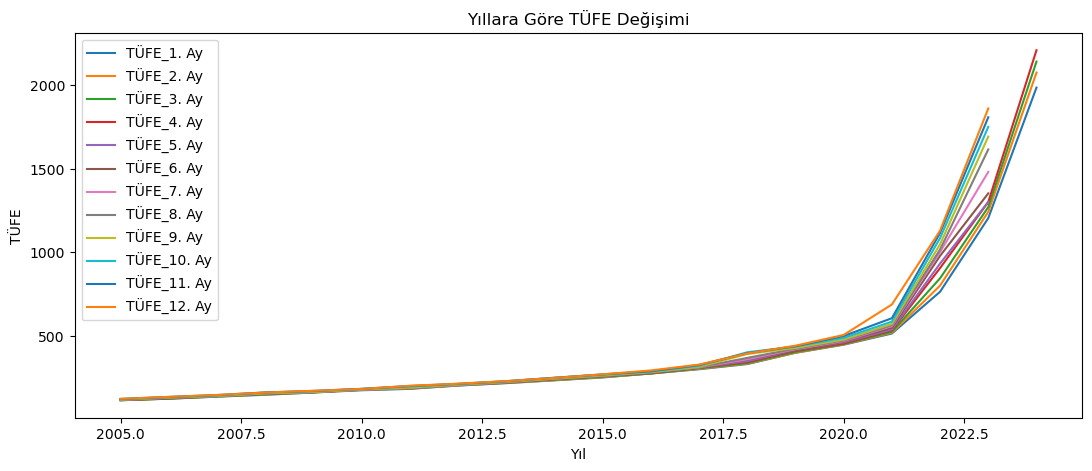

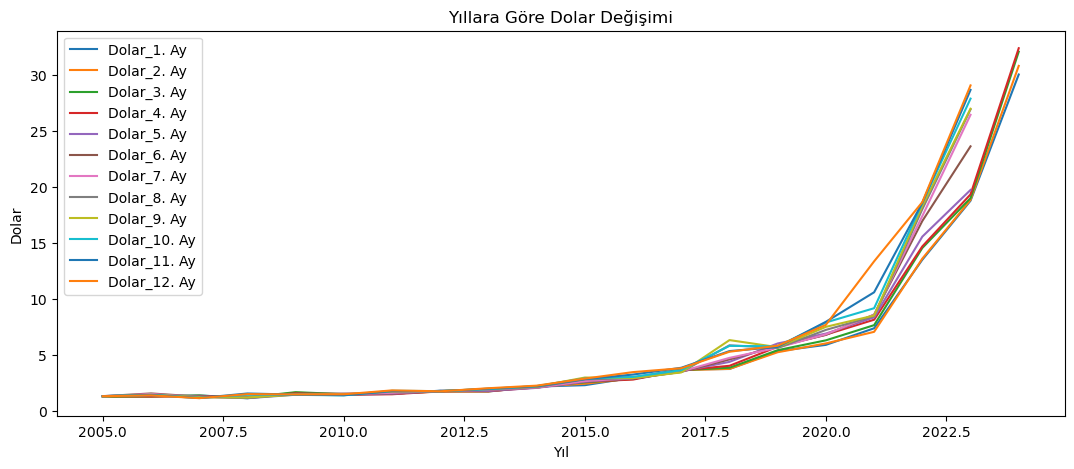

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
# Loop through each column in the DataFrame
for column in merged_df.columns:
    # Check if the column name starts with 'TÜFE'
    if column.startswith('TÜFE'):
        plt.plot(merged_df['Yıl'], merged_df[column], label=column)  
    
plt.xlabel("Yıl")
plt.ylabel("TÜFE")
plt.title('Yıllara Göre TÜFE Değişimi')
plt.legend()  
plt.show()

plt.figure(figsize=(13, 5))
for column in merged_df.columns:
    
    if column.startswith('Dolar'):
        plt.plot(merged_df['Yıl'], merged_df[column], label=column) 
plt.xlabel("Yıl")
plt.ylabel("Dolar")
plt.title('Yıllara Göre Dolar Değişimi')
plt.legend()  
plt.show()

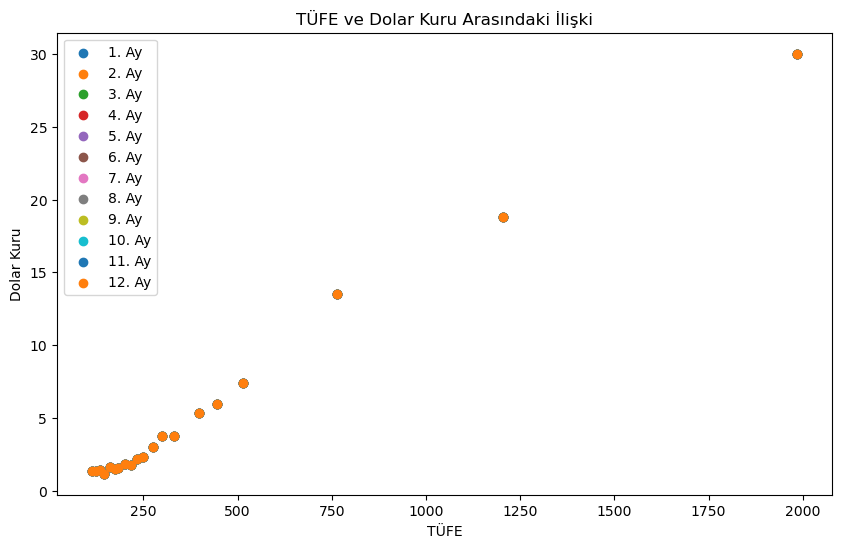

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


for ay in range(1, 13):
  
    tufe_column = [col for col in merged_df.columns if col.startswith('TÜFE')]
    dolar_column = [col for col in merged_df.columns if col.startswith('Dolar')]
    
   
    if tufe_column and dolar_column:
        
        plt.scatter(merged_df[tufe_column[0]], merged_df[dolar_column[0]], label=f'{ay}. Ay')

plt.xlabel('TÜFE')
plt.ylabel('Dolar Kuru')
plt.title('TÜFE ve Dolar Kuru Arasındaki İlişki')
plt.legend()
plt.show()


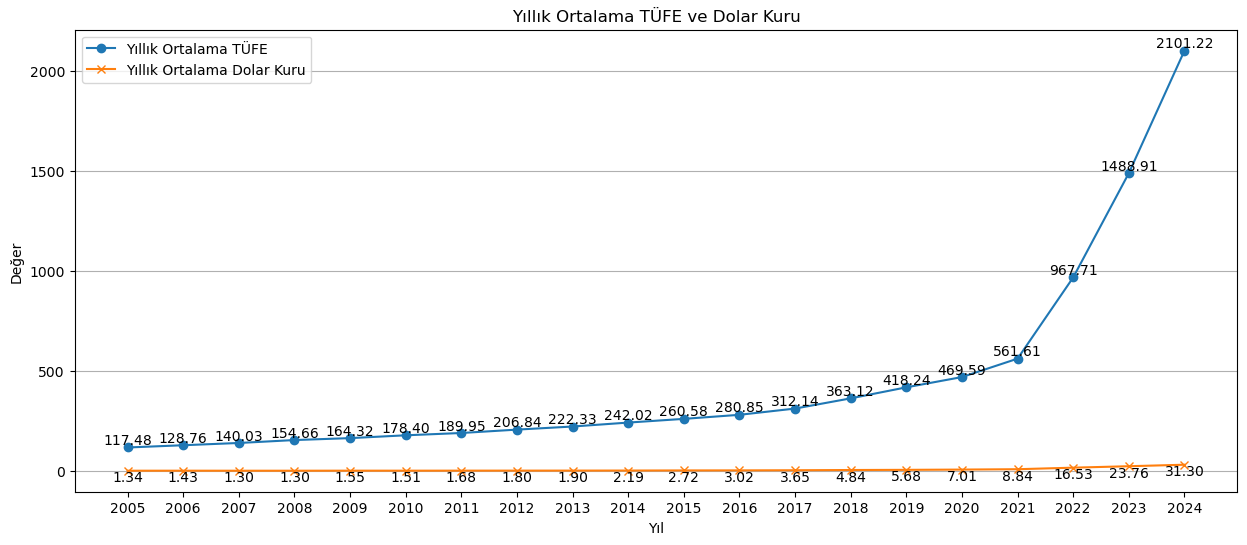

In [91]:
yıllık_tüfe = merged_df.iloc[:, 1:13].mean(axis=1)  # TÜFE sütunlarının ortalaması
yıllık_dolar = merged_df.iloc[:, 13:].mean(axis=1)  # Dolar sütunlarının ortalaması

plt.figure(figsize=(15, 6))
plt.plot(merged_df['Yıl'].unique(), yıllık_tüfe, label='Yıllık Ortalama TÜFE', marker='o')
plt.plot(merged_df['Yıl'].unique(), yıllık_dolar, label='Yıllık Ortalama Dolar Kuru', marker='x')

# Değerleri grafik üzerine yazdırma
for i, yil in enumerate(merged_df['Yıl'].unique()):
    plt.text(yil, yıllık_tüfe[i], f"{yıllık_tüfe[i]:.2f}", ha='center', va='bottom')
    plt.text(yil, yıllık_dolar[i], f"{yıllık_dolar[i]:.2f}", ha='center', va='top')

plt.xlabel('Yıl')
plt.ylabel('Değer')
plt.title('Yıllık Ortalama TÜFE ve Dolar Kuru')
plt.legend()
plt.xticks(merged_df['Yıl'].unique())  
plt.grid(axis='y')  
plt.show()

In [92]:
yıllık_tüfe

0     2101.217500
1     1488.914167
2      967.710833
3      561.614167
4      469.590833
5      418.235833
6      363.125000
7      312.144167
8      280.845833
9      260.585000
10     242.020000
11     222.333333
12     206.835000
13     189.945833
14     178.400000
15     164.323333
16     154.655833
17     140.030833
18     128.756667
19     117.481667
dtype: float64

In [93]:
tüfe_long = merged_df.melt(id_vars='Yıl', value_vars=[col for col in merged_df.columns if 'TÜFE' in col], var_name='Ay', value_name='TÜFE')
tüfe_long['Ay'] = tüfe_long['Ay'].str.extract('(\d+)').astype(int)  

# Dolar verilerini uzun formata getirme
dolar_long = merged_df.melt(id_vars='Yıl', value_vars=[col for col in merged_df.columns if 'Dolar' in col], var_name='Ay', value_name='Dolar')
dolar_long['Ay'] = dolar_long['Ay'].str.extract('(\d+)').astype(int)
merged_df = pd.merge(tüfe_long, dolar_long, on=['Yıl', 'Ay'], how='inner')


merged_df['Tarih'] = pd.to_datetime(merged_df['Yıl'].astype(str) + '-' + merged_df['Ay'].astype(str) + '-01')


merged_df.set_index('Tarih', inplace=True)
merged_df = merged_df.sort_index()


merged_df = merged_df.asfreq("MS")

In [94]:
merged_df

,Yıl,Ay,TÜFE,Dolar
Tarih,,,,
2005-01-01,2005,1,114.49,1.351500
2005-02-01,2005,2,114.51,1.310100
2005-03-01,2005,3,114.81,1.311261
2005-04-01,2005,4,115.63,1.358905
2005-05-01,2005,5,116.69,1.362848
...,...,...,...,...
2024-08-01,2024,8,NaN,NaN
2024-09-01,2024,9,NaN,NaN
2024-10-01,2024,10,NaN,NaN


In [111]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Örneğin, 2024 yılı sonu dolar kuru tahmini
model = ARIMA(merged_df['Dolar'], order=(5,1,0)) 
model_fit = model.fit()
model2 = ARIMA(merged_df['TÜFE'], order=(5,1,0)) 
model_fit2 = model2.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=12) 
print("2024 yılı sonu dolar kuru tahmini:", forecast[-1]) 
forecast = model_fit2.forecast(steps=12)  
print("2024 yılı sonu TÜFE tahmini:", forecast[-1]) 

C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\AppData\Local\Temp\ipykernel_1888\3457871593.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("2024 yılı sonu dolar kuru tahmini:", forecast[-1])


2024 yılı sonu dolar kuru tahmini: 34.49388509069918
2024 yılı sonu TÜFE tahmini: 3545.192446612064


C:\Users\PC\AppData\Local\Temp\ipykernel_1888\3457871593.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("2024 yılı sonu TÜFE tahmini:", forecast[-1])


C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PC\anaconda3\Lib\site-pac

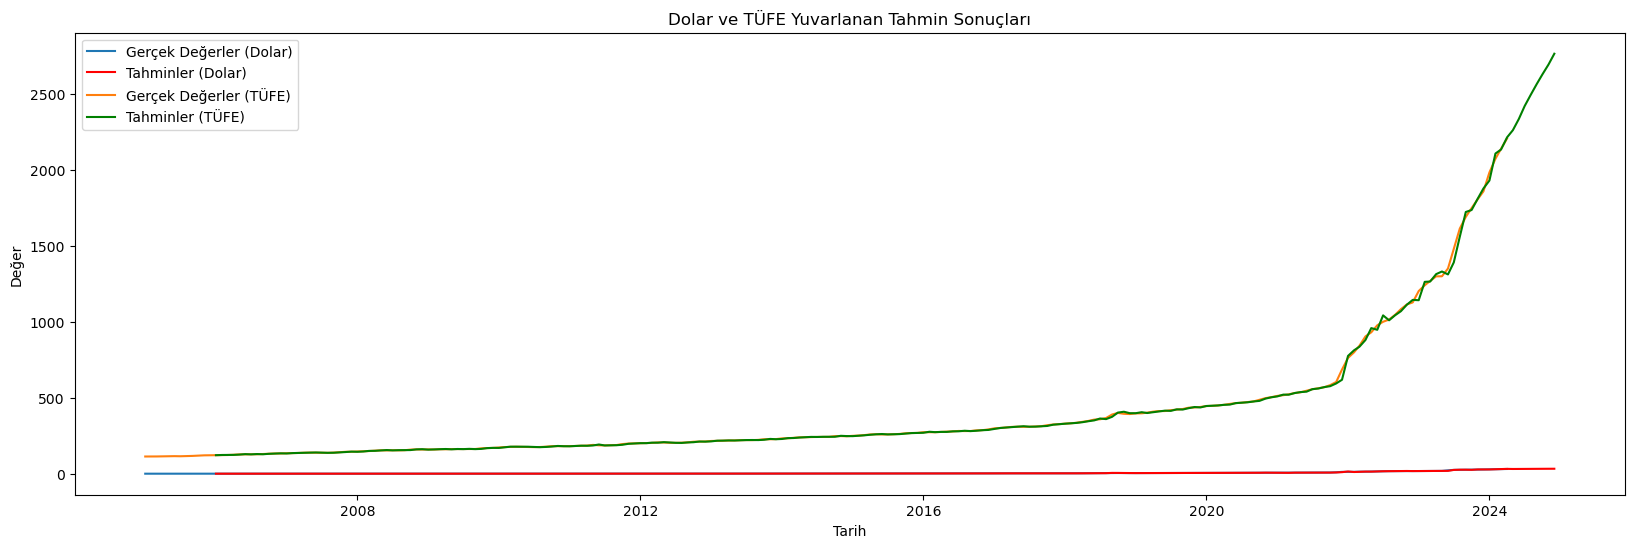

In [110]:
window_size = 12  # Eğitim penceresi boyutu (12 ay)
predictions = []
predictions2 = []


for i in range(window_size, len(merged_df)):
    # Eğitim verisini seçme
    train_data = merged_df['Dolar'][:i]
    train_data2 = merged_df['TÜFE'][:i]

    # ARIMA modeli oluşturma ve eğitme
    model = ARIMA(train_data, order=(5, 1, 0))
    model_fit = model.fit()
    model2 = ARIMA(train_data2, order=(5, 1, 0))
    model_fit2 = model2.fit()
    
    # Bir sonraki dönemi tahmin etme
    forecast = model_fit.forecast(steps=1)
    forecast2 = model_fit2.forecast(steps=1)
    
    # Tahmini kaydetme
    predictions.append(forecast.iloc[0])
    predictions2.append(forecast2.iloc[0])


# Tahminleri DataFrame'e dönüştürme
predictions_df = pd.DataFrame({'Tarih': merged_df.index[window_size:], 'Dolar Tahmini': predictions, 'TÜFE Tahmini': predictions2})
predictions_df.set_index('Tarih', inplace=True)

# Görselleştirme
plt.figure(figsize=(20, 6))
plt.plot(merged_df['Dolar'], label='Gerçek Değerler (Dolar)')
plt.plot(predictions_df['Dolar Tahmini'], label='Tahminler (Dolar)', color='red')
plt.plot(merged_df['TÜFE'], label='Gerçek Değerler (TÜFE)')
plt.plot(predictions_df['TÜFE Tahmini'], label='Tahminler (TÜFE)', color='green')
plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.title('Dolar ve TÜFE Yuvarlanan Tahmin Sonuçları')
plt.legend()
plt.show()